# Importing Libraries


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Reading Original Activity CSV Files with Pandas



*   num_data_AUT.csv: Numerical data.
*   vol_data_AUT.csv: volume-related data.
*   map_data_AUT.csv: Mapping or geographical data.
*   yoy_data_all_AUT.csv: Year-Over-Year data for all observations.







In [122]:
#Original Activity Data
num_data = pd.read_csv('num_data_AUT.csv')
vol_data = pd.read_csv('vol_data_AUT.csv')
map_data = pd.read_csv('map_data_AUT.csv')
yoy_data = pd.read_csv('yoy_data_all_AUT.csv')

In [123]:
print("num_data_AUT")
print(num_data.head())
print(num_data.shape)


print("vol_data_AUT")
print(vol_data.head())
print(vol_data.shape)

print("map_data_AUT")
print(map_data.head())
print(map_data.shape)

print("yoy_data_all_AUT")
print(yoy_data.head())
print(yoy_data.shape)

num_data_AUT
   month     date           num     num_unadj
0     72  2006-01  1.876291e+06  1.647458e+06
1     73  2006-02  1.803640e+06  1.679287e+06
2     74  2006-03  1.865074e+06  2.053148e+06
3     75  2006-04  1.823702e+06  1.886143e+06
4     76  2006-05  1.827913e+06  2.022892e+06
(222, 4)
vol_data_AUT
   month     date           vol     vol_unadj
0     72  2006-01  3.520212e+10  3.034697e+10
1     73  2006-02  3.344238e+10  3.069384e+10
2     74  2006-03  3.481673e+10  3.828179e+10
3     75  2006-04  3.428750e+10  3.513454e+10
4     76  2006-05  3.442798e+10  3.794379e+10
(222, 4)
map_data_AUT
   fips_code state_abbr     value
0          1         AL -0.071974
1          2         AK  0.043787
2          4         AZ -0.087750
3          5         AR -0.048006
4          6         CA -0.067144
(51, 3)
yoy_data_all_AUT
   month     date   yoy_num   yoy_vol
0     84  2007-01  0.001449  0.013209
1     85  2007-02  0.045930  0.088479
2     86  2007-03  0.014119  0.040401
3     87  

In [124]:
#Convert 'date' columns to datetime format

datasets = [num_data, vol_data, yoy_data]
for df in datasets:
    df['date'] = pd.to_datetime(df['date'])

# 2. Check for missing values
print("Missing values:")
for name, df in zip(['num_data', 'vol_data', 'map_data', 'yoy_data_all'],
                    [num_data, vol_data, map_data, yoy_data]):
    print(f"{name}:")
    print(df.isnull().sum())
    print()

# 3. Check for duplicates
for name, df in zip(['num_data', 'vol_data', 'map_data', 'yoy_data_all'],
                    [num_data, vol_data, map_data, yoy_data]):
    print(f"{name} - Duplicates: {df.duplicated().sum()}")


Missing values:
num_data:
month        0
date         0
num          0
num_unadj    0
dtype: int64

vol_data:
month        0
date         0
vol          0
vol_unadj    0
dtype: int64

map_data:
fips_code     0
state_abbr    0
value         0
dtype: int64

yoy_data_all:
month      0
date       0
yoy_num    0
yoy_vol    0
dtype: int64

num_data - Duplicates: 0
vol_data - Duplicates: 0
map_data - Duplicates: 0
yoy_data_all - Duplicates: 0


# Reading Lending by neighborhood relative income level Data

In [125]:
vol_income_data = pd.read_csv('volume_data_Income_Level_AUT.csv')
yoy_income_data = pd.read_csv('yoy_data_Income_Level_AUT.csv')

In [126]:
print("vol_income_data")
print(vol_income_data.head())
print(vol_income_data.shape)


print("yoy_income_data")
print(yoy_income_data.head())
print(yoy_income_data.shape)

vol_income_data
   month     date           vol     vol_unadj income_level_group
0    123  2010-04  1.131306e+10  1.145620e+10               High
1    123  2010-04  1.161548e+10  1.199791e+10             Middle
2    123  2010-04  3.860946e+09  4.025362e+09           Moderate
3    123  2010-04  6.167375e+08  6.523080e+08                Low
4    124  2010-05  1.128695e+10  1.199027e+10               High
(684, 5)
yoy_income_data
   month     date   low_yoy  moderate_yoy  middle_yoy  high_yoy
0    135  2011-04  0.201859      0.156443    0.139737  0.121494
1    136  2011-05  0.139250      0.157949    0.114707  0.086040
2    137  2011-06  0.152692      0.151641    0.075802  0.046423
3    138  2011-07  0.181315      0.059736    0.044416  0.036274
4    139  2011-08  0.138991      0.132706    0.115756  0.089083
(159, 6)


In [127]:
## Preprocessing vol_income_data
vol_income_data['date'] = pd.to_datetime(vol_income_data['date'])
print("Missing values in vol_income_data:")
print(vol_income_data.isnull().sum())

# Preprocessing yoy_income_data
yoy_income_data['date'] = pd.to_datetime(yoy_income_data['date'])
print("\nMissing values in yoy_income_data:")
print(yoy_income_data.isnull().sum())

# Check for duplicates
print("\nDuplicates in vol_income_data:", vol_income_data.duplicated().sum())
print("Duplicates in yoy_income_data:", yoy_income_data.duplicated().sum())

# Preview cleaned data
print("\nCleaned vol_income_data:")
print(vol_income_data.head())
print("\nCleaned yoy_income_data:")
print(yoy_income_data.head())


Missing values in vol_income_data:
month                 0
date                  0
vol                   0
vol_unadj             0
income_level_group    0
dtype: int64

Missing values in yoy_income_data:
month           0
date            0
low_yoy         0
moderate_yoy    0
middle_yoy      0
high_yoy        0
dtype: int64

Duplicates in vol_income_data: 0
Duplicates in yoy_income_data: 0

Cleaned vol_income_data:
   month       date           vol     vol_unadj income_level_group
0    123 2010-04-01  1.131306e+10  1.145620e+10               High
1    123 2010-04-01  1.161548e+10  1.199791e+10             Middle
2    123 2010-04-01  3.860946e+09  4.025362e+09           Moderate
3    123 2010-04-01  6.167375e+08  6.523080e+08                Low
4    124 2010-05-01  1.128695e+10  1.199027e+10               High

Cleaned yoy_income_data:
   month       date   low_yoy  moderate_yoy  middle_yoy  high_yoy
0    135 2011-04-01  0.201859      0.156443    0.139737  0.121494
1    136 2011-05-01  0

# Reading Borrower risk profiles Data

In [128]:
# Borrower Risk
vol_score_data = pd.read_csv('volume_data_Score_Level_AUT.csv')
yoy_score_data = pd.read_csv('yoy_data_Score_Level_AUT.csv')


In [129]:
print("vol_score_data")
print(vol_score_data.head())
print(vol_score_data.shape)


print("yoy_score_data")
print(yoy_score_data.head())
print(yoy_score_data.shape)

vol_score_data
   month     date           vol     vol_unadj credit_score_group
0     84  2007-01  1.520573e+10  1.249401e+10        Super-prime
1     84  2007-01  3.152545e+09  2.778729e+09           Subprime
2     84  2007-01  3.756974e+09  3.554127e+09      Deep subprime
3     84  2007-01  4.618212e+09  3.990349e+09         Near-prime
4     84  2007-01  8.018890e+09  6.752826e+09              Prime
(1050, 5)
yoy_score_data
   month     date  deep-subprime_yoy  subprime_yoy  near-prime_yoy  prime_yoy  \
0     96  2008-01          -0.086558     -0.062379       -0.064670  -0.027534   
1     97  2008-02          -0.095812     -0.079310       -0.076208   0.025287   
2     98  2008-03          -0.201478     -0.191334       -0.114561  -0.052629   
3     99  2008-04          -0.189983     -0.125789       -0.084825  -0.009580   
4    100  2008-05          -0.239760     -0.207918       -0.147928  -0.064123   

   super-prime_yoy  
0         0.031393  
1         0.063102  
2         0.056925  

In [130]:
#Preprocessing vol_score_data
vol_score_data['date'] = pd.to_datetime(vol_score_data['date'])
print("\nMissing values in vol_score_data:")
print(vol_score_data.isnull().sum())

# Preprocessing yoy_score_data
yoy_score_data['date'] = pd.to_datetime(yoy_score_data['date'])
print("\nMissing values in yoy_score_data:")
print(yoy_score_data.isnull().sum())

# Check for duplicates
print("\nDuplicates in vol_score_data:", vol_score_data.duplicated().sum())
print("Duplicates in yoy_score_data:", yoy_score_data.duplicated().sum())

# Preview cleaned data
print("\nCleaned vol_score_data:")
print(vol_score_data.head())
print("\nCleaned yoy_score_data:")
print(yoy_score_data.head())



Missing values in vol_score_data:
month                 0
date                  0
vol                   0
vol_unadj             0
credit_score_group    0
dtype: int64

Missing values in yoy_score_data:
month                0
date                 0
deep-subprime_yoy    0
subprime_yoy         0
near-prime_yoy       0
prime_yoy            0
super-prime_yoy      0
dtype: int64

Duplicates in vol_score_data: 0
Duplicates in yoy_score_data: 0

Cleaned vol_score_data:
   month       date           vol     vol_unadj credit_score_group
0     84 2007-01-01  1.520573e+10  1.249401e+10        Super-prime
1     84 2007-01-01  3.152545e+09  2.778729e+09           Subprime
2     84 2007-01-01  3.756974e+09  3.554127e+09      Deep subprime
3     84 2007-01-01  4.618212e+09  3.990349e+09         Near-prime
4     84 2007-01-01  8.018890e+09  6.752826e+09              Prime

Cleaned yoy_score_data:
   month       date  deep-subprime_yoy  subprime_yoy  near-prime_yoy  \
0     96 2008-01-01          -0.08

# Reading Inquiry Activity Data

In [131]:
#Inquiry Activity

crt_data = pd.read_csv('crt_data_AUT.csv')
inq_data = pd.read_csv('inq_data_AUT.csv')

In [132]:
print("crt_data")
print(crt_data.head())
print(crt_data.shape)


print("inq_data")
print(inq_data.head())
print(inq_data.shape)

crt_data
   month     date  tightness_index  unadjusted_credit_tightness_index
0     60  2005-01         94.99804                           96.84039
1     61  2005-02         94.48662                           93.20391
2     62  2005-03         94.55600                           93.82881
3     63  2005-04         95.53479                           94.94672
4     64  2005-05         96.30883                           94.84156
(236, 4)
inq_data
   month     date  inquiry_index  unadjusted_inquiry_index
0     60  2005-01      116.75884                 114.56336
1     61  2005-02      118.21960                 117.87181
2     62  2005-03      121.75229                 131.33531
3     63  2005-04      126.18976                 127.72649
4     64  2005-05      124.80750                 129.99249
(238, 4)


In [133]:
# Preprocessing crt_data
crt_data['date'] = pd.to_datetime(crt_data['date'])
print("Missing values in crt_data:")
print(crt_data.isnull().sum())

# Preprocessing inq_data
inq_data['date'] = pd.to_datetime(inq_data['date'])
print("\nMissing values in inq_data:")
print(inq_data.isnull().sum())

# Check for duplicates
print("\nDuplicates in crt_data:", crt_data.duplicated().sum())
print("Duplicates in inq_data:", inq_data.duplicated().sum())

# Preview cleaned data
print("\nCleaned crt_data:")
print(crt_data.head())
print("\nCleaned inq_data:")
print(inq_data.head())


Missing values in crt_data:
month                                0
date                                 0
tightness_index                      0
unadjusted_credit_tightness_index    0
dtype: int64

Missing values in inq_data:
month                       0
date                        0
inquiry_index               0
unadjusted_inquiry_index    0
dtype: int64

Duplicates in crt_data: 0
Duplicates in inq_data: 0

Cleaned crt_data:
   month       date  tightness_index  unadjusted_credit_tightness_index
0     60 2005-01-01         94.99804                           96.84039
1     61 2005-02-01         94.48662                           93.20391
2     62 2005-03-01         94.55600                           93.82881
3     63 2005-04-01         95.53479                           94.94672
4     64 2005-05-01         96.30883                           94.84156

Cleaned inq_data:
   month       date  inquiry_index  unadjusted_inquiry_index
0     60 2005-01-01      116.75884                 114.56

# Reading Lending by borrower age Data

In [134]:
volume_age_data = pd.read_csv('volume_data_Age_Group_AUT.csv')
yoy_age_data = pd.read_csv('yoy_data_Age_Group_AUT.csv')

In [135]:
print("volume_age_data")
print(volume_age_data.head())
print(volume_age_data.shape)


print("yoy_age_data")
print(yoy_age_data.head())
print(yoy_age_data.shape)

volume_age_data
   month     date           vol     vol_unadj         age_group
0     72  2006-01  1.292299e+10  1.116222e+10         Age 45-64
1     72  2006-01  1.316540e+10  1.134501e+10         Age 30-44
2     72  2006-01  2.114274e+09  1.951595e+09  Age 65 and older
3     72  2006-01  6.578789e+09  5.536890e+09   Younger than 30
4     73  2006-02  1.216385e+10  1.107611e+10         Age 45-64
(888, 5)
yoy_age_data
   month     date  younger-than-30_yoy  30-44_yoy  45-64_yoy  65-and-older_yoy
0     84  2007-01             0.051213  -0.013939  -0.009666          0.022276
1     85  2007-02             0.079540   0.014328   0.054789          0.104482
2     86  2007-03             0.070108  -0.017420   0.021885         -0.013822
3     87  2007-04             0.025250   0.002233   0.018878          0.046495
4     88  2007-05             0.027628   0.007045   0.052726          0.135698
(210, 6)


In [136]:
# Preprocessing volume_age_data
volume_age_data['date'] = pd.to_datetime(volume_age_data['date'])
print("\nMissing values in volume_age_data:")
print(volume_age_data.isnull().sum())

# Preprocessing yoy_age_data
yoy_age_data['date'] = pd.to_datetime(yoy_age_data['date'])
print("\nMissing values in yoy_age_data:")
print(yoy_age_data.isnull().sum())

# Check for duplicates
print("\nDuplicates in volume_age_data:", volume_age_data.duplicated().sum())
print("Duplicates in yoy_age_data:", yoy_age_data.duplicated().sum())

# Preview cleaned data
print("\nCleaned volume_age_data:")
print(volume_age_data.head())
print("\nCleaned yoy_age_data:")
print(yoy_age_data.head())



Missing values in volume_age_data:
month        0
date         0
vol          0
vol_unadj    0
age_group    0
dtype: int64

Missing values in yoy_age_data:
month                  0
date                   0
younger-than-30_yoy    0
30-44_yoy              0
45-64_yoy              0
65-and-older_yoy       0
dtype: int64

Duplicates in volume_age_data: 0
Duplicates in yoy_age_data: 0

Cleaned volume_age_data:
   month       date           vol     vol_unadj         age_group
0     72 2006-01-01  1.292299e+10  1.116222e+10         Age 45-64
1     72 2006-01-01  1.316540e+10  1.134501e+10         Age 30-44
2     72 2006-01-01  2.114274e+09  1.951595e+09  Age 65 and older
3     72 2006-01-01  6.578789e+09  5.536890e+09   Younger than 30
4     73 2006-02-01  1.216385e+10  1.107611e+10         Age 45-64

Cleaned yoy_age_data:
   month       date  younger-than-30_yoy  30-44_yoy  45-64_yoy  \
0     84 2007-01-01             0.051213  -0.013939  -0.009666   
1     85 2007-02-01             0.07954

# Visualization and Analysis


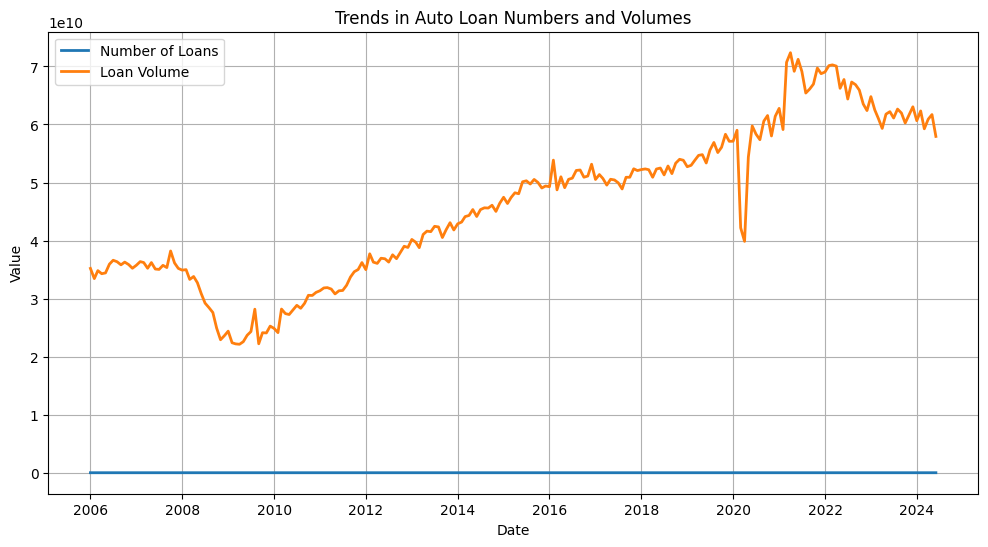

In [137]:
# Plot loan numbers and volumes over time
plt.figure(figsize=(12, 6))
plt.plot(num_data['date'], num_data['num'], label='Number of Loans', linewidth=2)
plt.plot(vol_data['date'], vol_data['vol'], label='Loan Volume', linewidth=2)
plt.title('Trends in Auto Loan Numbers and Volumes')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


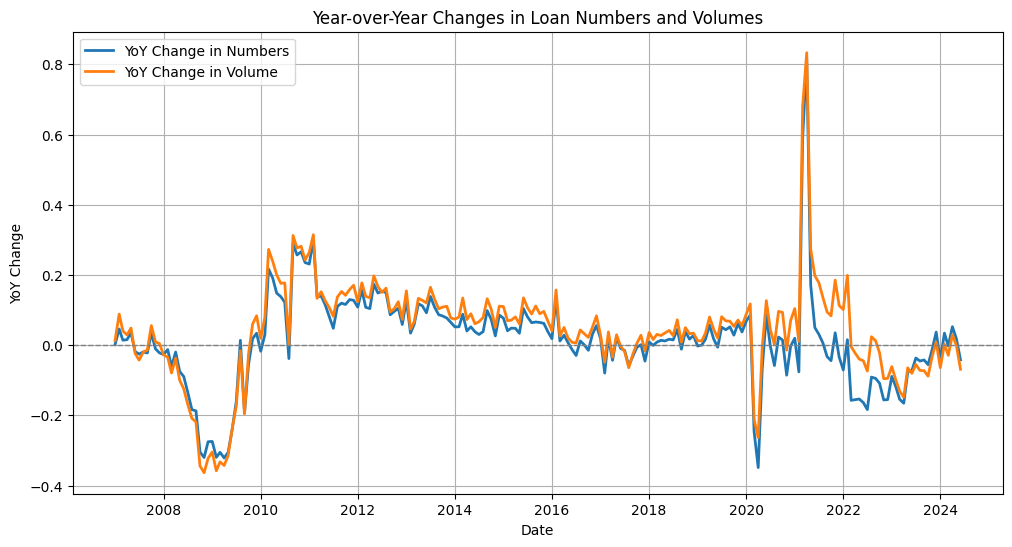

In [138]:
# Plot YoY changes for numbers and volumes
plt.figure(figsize=(12, 6))
plt.plot(yoy_data['date'], yoy_data['yoy_num'], label='YoY Change in Numbers', linewidth=2)
plt.plot(yoy_data['date'], yoy_data['yoy_vol'], label='YoY Change in Volume', linewidth=2)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Year-over-Year Changes in Loan Numbers and Volumes')
plt.xlabel('Date')
plt.ylabel('YoY Change')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-139-74104b8d37e0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=map_data, x='value', y='state_abbr', palette='coolwarm')


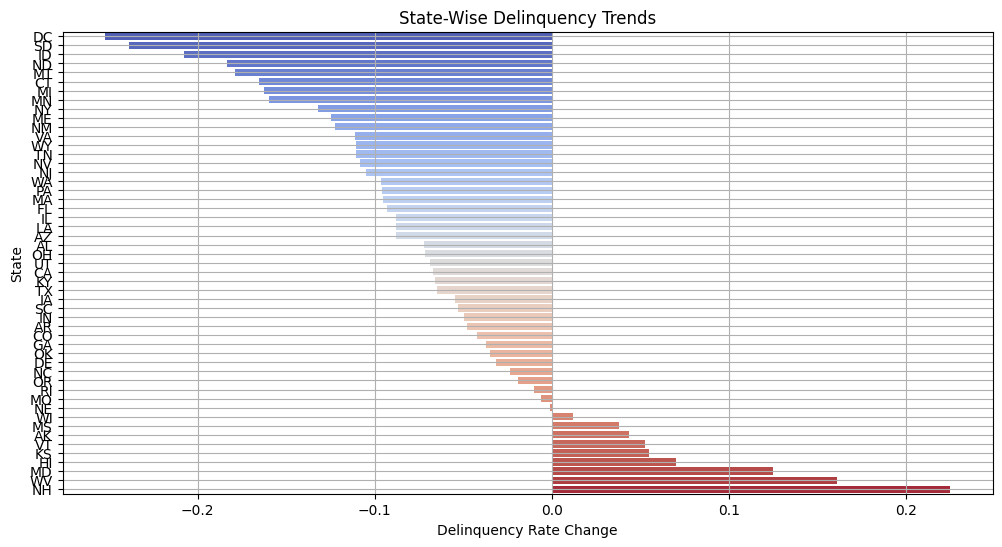

In [139]:
# Barplot for state-wise delinquency rates
plt.figure(figsize=(12, 6))
map_data.sort_values('value', inplace=True)
sns.barplot(data=map_data, x='value', y='state_abbr', palette='coolwarm')
plt.title('State-Wise Delinquency Trends')
plt.xlabel('Delinquency Rate Change')
plt.ylabel('State')
plt.grid(True)
plt.show()


<ipython-input-140-e71be6b250ec>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=vol_score_data, x='credit_score_group', y='vol', ci=None, palette='coolwarm')
<ipython-input-140-e71be6b250ec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vol_score_data, x='credit_score_group', y='vol', ci=None, palette='coolwarm')


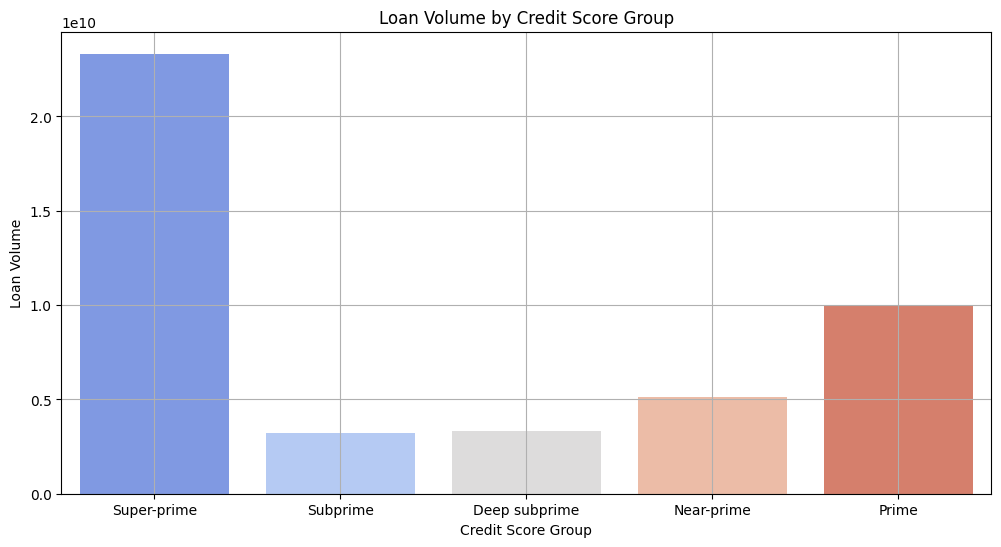

In [140]:
# Borrower risk trends (volumes by credit score group)
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=vol_score_data, x='credit_score_group', y='vol', ci=None, palette='coolwarm')
plt.title('Loan Volume by Credit Score Group')
plt.xlabel('Credit Score Group')
plt.ylabel('Loan Volume')
plt.grid(True)
plt.show()


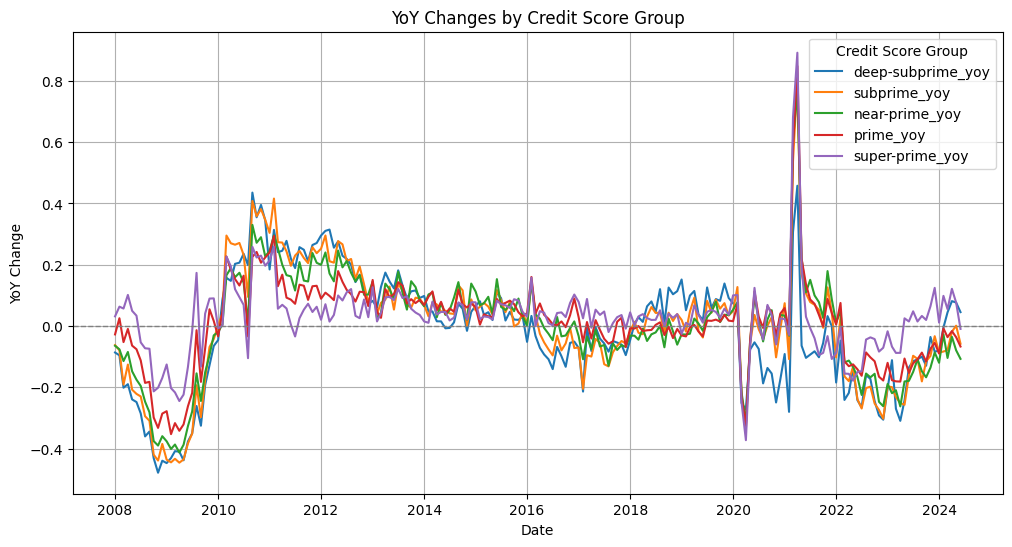

In [141]:
# Plot YoY changes by credit score group
plt.figure(figsize=(12, 6))

score_groups = ['deep-subprime_yoy', 'subprime_yoy', 'near-prime_yoy', 'prime_yoy', 'super-prime_yoy']
for group in score_groups:
    plt.plot(yoy_score_data['date'], yoy_score_data[group], label=group)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('YoY Changes by Credit Score Group')
plt.xlabel('Date')
plt.ylabel('YoY Change')
plt.legend(title='Credit Score Group')
plt.grid(True)
plt.show()


<ipython-input-142-9132374fe17b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vol_income_data, x='income_level_group', y='vol', errorbar=None, palette='viridis')


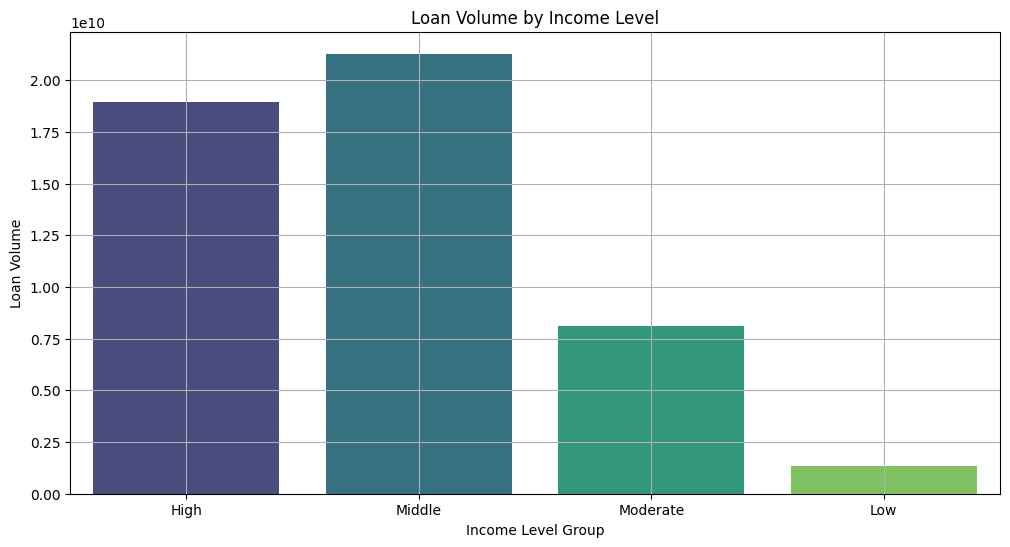

In [142]:
plt.figure(figsize=(12, 6))
sns.barplot(data=vol_income_data, x='income_level_group', y='vol', errorbar=None, palette='viridis')
plt.title('Loan Volume by Income Level')
plt.xlabel('Income Level Group')
plt.ylabel('Loan Volume')
plt.grid(True)
plt.show()



   month_x       date         vol_x   vol_unadj_x income_level_group  month_y  \
0      123 2010-04-01  1.131306e+10  1.145620e+10               High      123   
1      123 2010-04-01  1.131306e+10  1.145620e+10               High      123   
2      123 2010-04-01  1.131306e+10  1.145620e+10               High      123   
3      123 2010-04-01  1.131306e+10  1.145620e+10               High      123   
4      123 2010-04-01  1.131306e+10  1.145620e+10               High      123   

          vol_y   vol_unadj_y credit_score_group  
0  1.491767e+10  1.532841e+10        Super-prime  
1  1.665606e+09  1.755309e+09           Subprime  
2  1.756474e+09  1.754688e+09      Deep subprime  
3  2.704023e+09  2.855180e+09         Near-prime  
4  5.653653e+09  5.948868e+09              Prime  


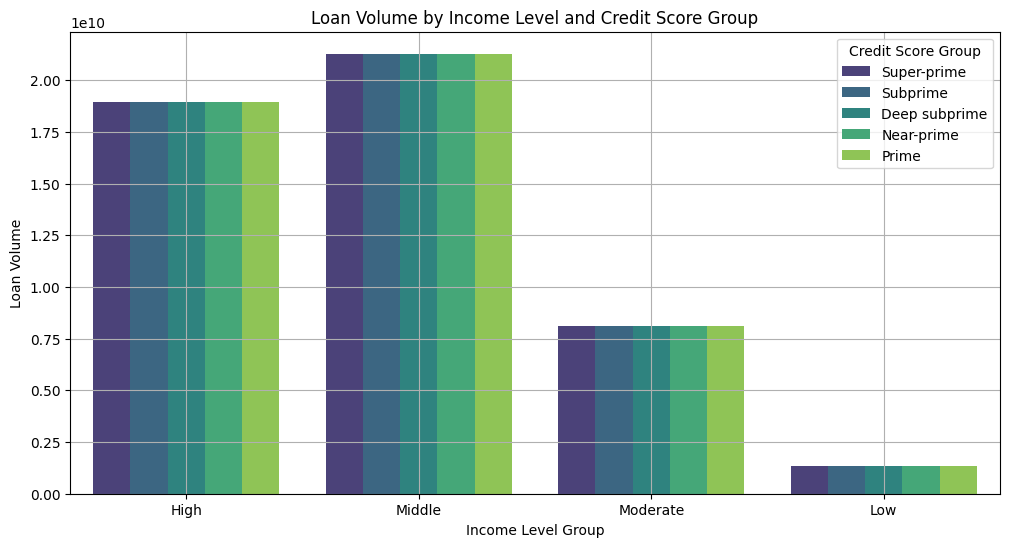

In [143]:
merged_data = vol_income_data.merge(vol_score_data, on='date', how='inner')
print(merged_data.head())


plt.figure(figsize=(12, 6))
sns.barplot(
    data=merged_data,
    x='income_level_group',
    y='vol_x',  # Use vol_x or vol_y depending on the column you want
    hue='credit_score_group',
    errorbar=None,
    palette='viridis'
)
plt.title('Loan Volume by Income Level and Credit Score Group')
plt.xlabel('Income Level Group')
plt.ylabel('Loan Volume')
plt.legend(title='Credit Score Group')
plt.grid(True)
plt.show()


In [144]:
# Calculate total loan volume
total_vol = merged_data['vol_x'].sum()

# Group by income level and credit score group
grouped_data = merged_data.groupby(['income_level_group', 'credit_score_group'])['vol_x'].sum().reset_index()

# Calculate percentage contribution
grouped_data['percentage'] = (grouped_data['vol_x'] / total_vol) * 100

# Display the percentage contributions
print(grouped_data.sort_values(by='percentage', ascending=False))


   income_level_group credit_score_group         vol_x  percentage
10             Middle      Deep subprime  3.639739e+12    8.570320
14             Middle        Super-prime  3.639739e+12    8.570320
13             Middle           Subprime  3.639739e+12    8.570320
12             Middle              Prime  3.639739e+12    8.570320
11             Middle         Near-prime  3.639739e+12    8.570320
1                High         Near-prime  3.241466e+12    7.632527
0                High      Deep subprime  3.241466e+12    7.632527
4                High        Super-prime  3.241466e+12    7.632527
3                High           Subprime  3.241466e+12    7.632527
2                High              Prime  3.241466e+12    7.632527
15           Moderate      Deep subprime  1.384536e+12    3.260101
16           Moderate         Near-prime  1.384536e+12    3.260101
17           Moderate              Prime  1.384536e+12    3.260101
18           Moderate           Subprime  1.384536e+12    3.26

In [145]:
# Define scoring weights
income_weights = {'High': 40, 'Middle': 30, 'Moderate': 20, 'Low': 10}
credit_score_weights = {
    'Super-prime': 50,
    'Prime': 40,
    'Near-prime': 30,
    'Subprime': 20,
    'Deep subprime': 10
}

def calculate_credit_score(row):
    income_score = income_weights[row['income_level_group']]
    credit_score = credit_score_weights[row['credit_score_group']]
    return income_score + credit_score

merged_data['credit_score'] = merged_data.apply(calculate_credit_score, axis=1)

print(merged_data[['income_level_group', 'credit_score_group', 'credit_score']].head())


  income_level_group credit_score_group  credit_score
0               High        Super-prime            90
1               High           Subprime            60
2               High      Deep subprime            50
3               High         Near-prime            70
4               High              Prime            80


In [146]:
# Correlation between loan volume and creditworthiness factors
correlation_data = merged_data[['vol_x', 'credit_score', 'vol_unadj_x']]
correlation_matrix = correlation_data.corr()
print(correlation_matrix)


                 vol_x  credit_score  vol_unadj_x
vol_x         1.000000      0.524323     0.992719
credit_score  0.524323      1.000000     0.520731
vol_unadj_x   0.992719      0.520731     1.000000


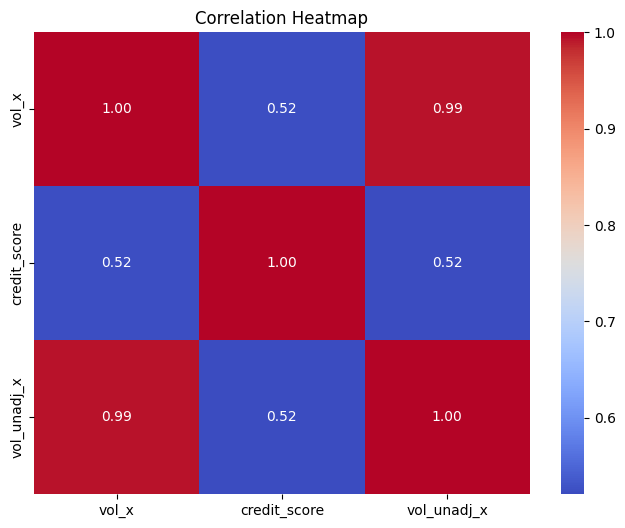

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')
plt.show()


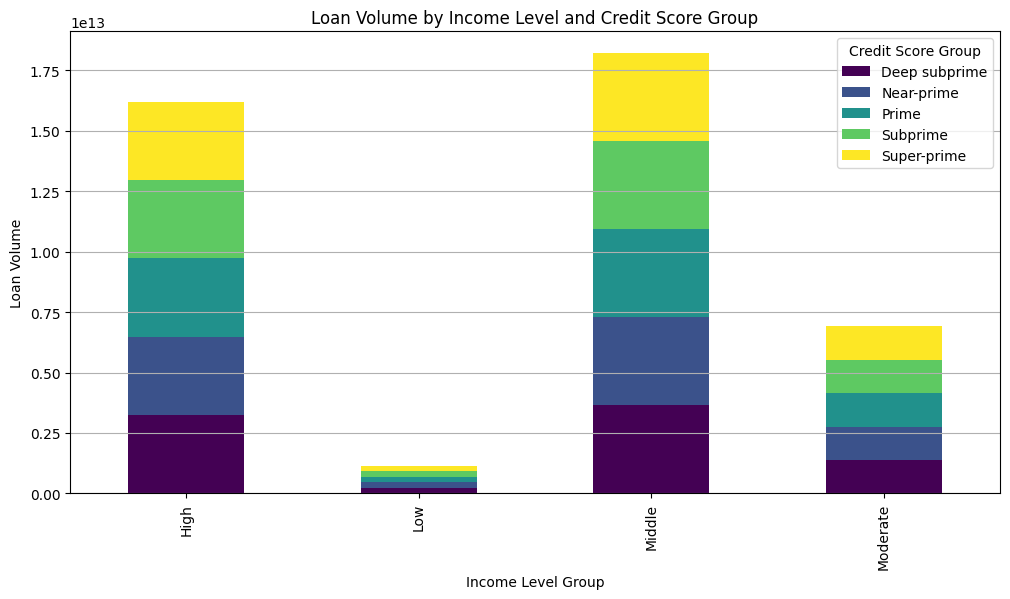

In [148]:
# Prepare data for stacked bar plot
stacked_data = merged_data.groupby(['income_level_group', 'credit_score_group'])['vol_x'].sum().unstack()

# Plot stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Loan Volume by Income Level and Credit Score Group')
plt.xlabel('Income Level Group')
plt.ylabel('Loan Volume')
plt.legend(title='Credit Score Group')
plt.grid(axis='y')
plt.show()


# Tightness Index

In [149]:
# tightness_index with merged_data
merged_data = merged_data.merge(crt_data[['date', 'tightness_index']], on='date', how='left')


print(merged_data.head())


   month_x       date         vol_x   vol_unadj_x income_level_group  month_y  \
0      123 2010-04-01  1.131306e+10  1.145620e+10               High      123   
1      123 2010-04-01  1.131306e+10  1.145620e+10               High      123   
2      123 2010-04-01  1.131306e+10  1.145620e+10               High      123   
3      123 2010-04-01  1.131306e+10  1.145620e+10               High      123   
4      123 2010-04-01  1.131306e+10  1.145620e+10               High      123   

          vol_y   vol_unadj_y credit_score_group  credit_score  \
0  1.491767e+10  1.532841e+10        Super-prime            90   
1  1.665606e+09  1.755309e+09           Subprime            60   
2  1.756474e+09  1.754688e+09      Deep subprime            50   
3  2.704023e+09  2.855180e+09         Near-prime            70   
4  5.653653e+09  5.948868e+09              Prime            80   

   tightness_index  
0         96.42211  
1         96.42211  
2         96.42211  
3         96.42211  
4         9

In [150]:
print(merged_data['tightness_index'].describe())
print(merged_data['tightness_index'].unique())


count    3420.000000
mean       84.336333
std         4.137426
min        77.068560
25%        81.161950
50%        84.339100
75%        86.965550
max        96.422110
Name: tightness_index, dtype: float64
[96.42211 95.93429 94.52927 94.67129 94.02635 93.02436 91.53594 90.49106
 91.38355 88.02878 88.2357  88.63553 87.37458 86.29814 86.25015 84.39205
 84.5117  82.69013 81.71747 81.77987 81.40109 82.02668 81.44004 79.70568
 80.29084 80.15582 81.16195 81.22937 80.1903  80.18401 81.39285 81.01249
 79.87928 80.61626 79.61177 79.25789 79.42219 79.18755 78.13954 78.77825
 79.23057 79.56127 78.89071 78.35575 78.32841 78.14907 78.51587 79.15616
 79.50827 78.88699 78.70814 78.27303 78.19025 79.6063  79.65758 78.68345
 81.05763 78.82082 78.0813  78.2129  78.02449 77.06856 79.05158 79.6612
 79.71474 79.76747 80.8233  81.29095 82.29441 81.20427 81.05439 83.13507
 82.7168  82.9885  83.16447 82.44764 82.83963 83.23221 82.3762  83.52302
 82.93144 83.89447 84.60742 83.55064 83.66894 84.44708 84.83999 8

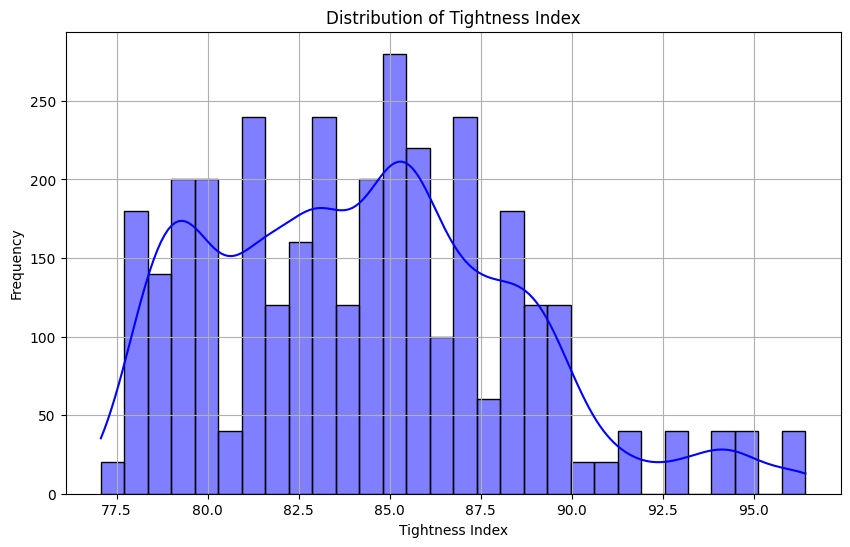

In [151]:
tightness_values = merged_data['tightness_index']

# Plot the distribution of tightness_index
plt.figure(figsize=(10, 6))
sns.histplot(tightness_values, kde=True, bins=30, color='blue')
plt.title('Distribution of Tightness Index')
plt.xlabel('Tightness Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


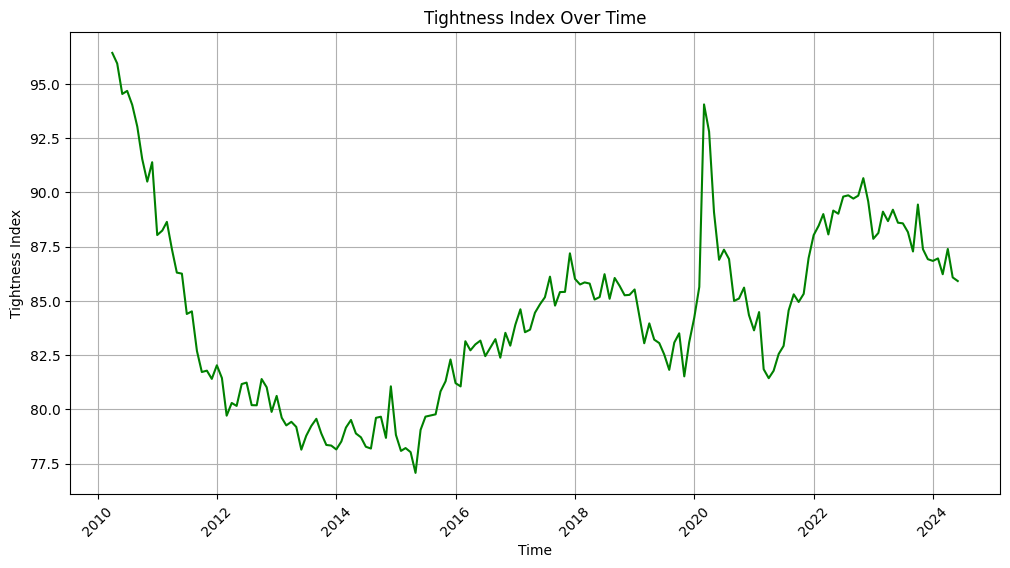

In [152]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['tightness_index'], color='green')
plt.title('Tightness Index Over Time')
plt.xlabel('Time')
plt.ylabel('Tightness Index')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


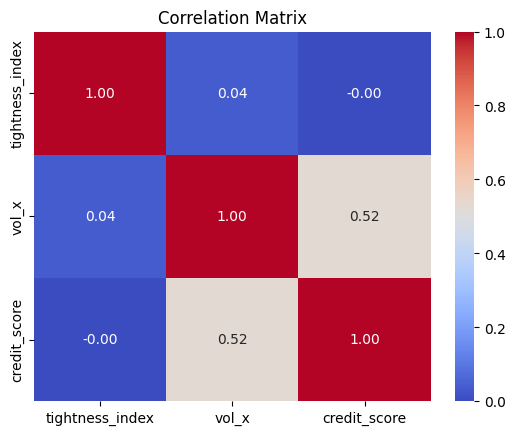

In [153]:
correlation_matrix = merged_data[['tightness_index', 'vol_x', 'credit_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Credit Score Model

MAE: 6165104574.89
RMSE: 7434896108.22
R² Score: 0.28


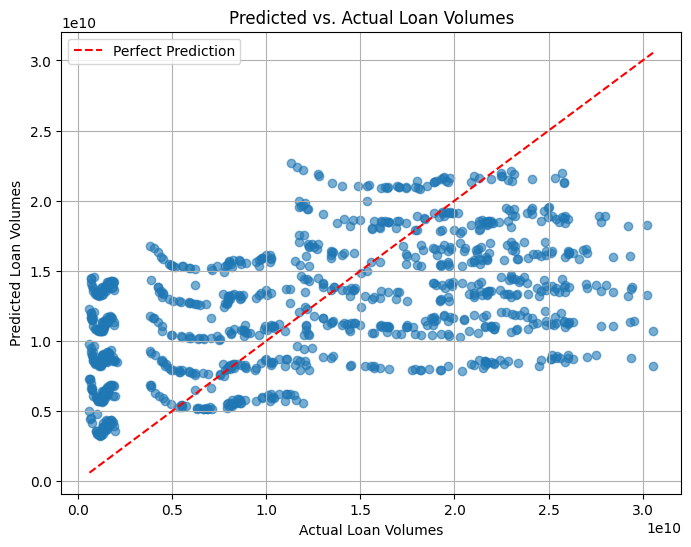

In [154]:

# Step 1: Prepare the data
data = merged_data.copy()

# Encode categorical variables
data['income_level_group'] = LabelEncoder().fit_transform(data['income_level_group'])
data['credit_score_group'] = LabelEncoder().fit_transform(data['credit_score_group'])

# Select features and target variable
X = data[['tightness_index', 'credit_score', 'income_level_group']]
y = data['vol_x']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 4: Visualize predicted vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Perfect Prediction")
plt.xlabel("Actual Loan Volumes")
plt.ylabel("Predicted Loan Volumes")
plt.title("Predicted vs. Actual Loan Volumes")
plt.legend()
plt.grid(True)
plt.show()



Random Forest - MAE: 463873855.33
Random Forest - RMSE: 946337915.24
Random Forest - R² Score: 0.99
Feature Importances:
tightness_index: 0.14
credit_score: 0.04
income_level_group: 0.83
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest - MAE: 475437106.76
Tuned Random Forest - RMSE: 948221052.77
Tuned Random Forest - R² Score: 0.99


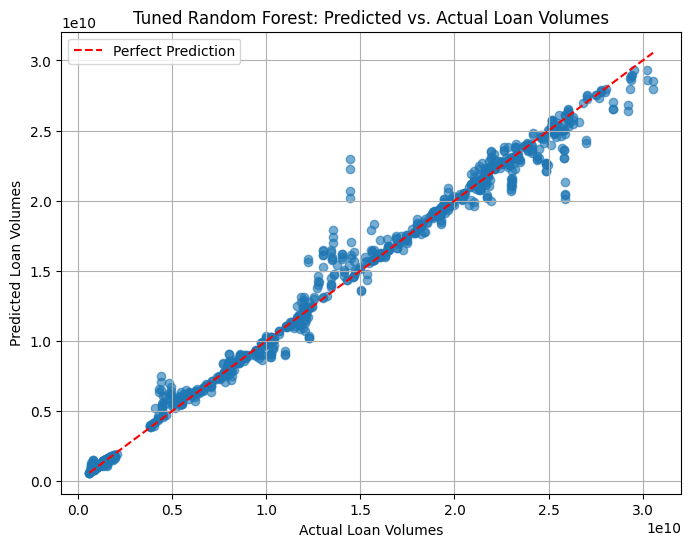

In [155]:
#standarlization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (using scaled features)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MAE: {mae:.2f}")
print(f"Random Forest - RMSE: {rmse:.2f}")
print(f"Random Forest - R² Score: {r2:.2f}")

# Feature importance
feature_importances = rf.feature_importances_
features = X.columns

print("Feature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.2f}")

# Step 4: Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Step 5: Re-train with best parameters
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned Random Forest - MAE: {mae_best:.2f}")
print(f"Tuned Random Forest - RMSE: {rmse_best:.2f}")
print(f"Tuned Random Forest - R² Score: {r2_best:.2f}")

# Visualize predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Perfect Prediction")
plt.xlabel("Actual Loan Volumes")
plt.ylabel("Predicted Loan Volumes")
plt.title("Tuned Random Forest: Predicted vs. Actual Loan Volumes")
plt.legend()
plt.grid(True)
plt.show()


In [156]:
print(merged_data.columns)
subprime_data = merged_data[merged_data['credit_score_group'] == 'Subprime']
subprime_vol = subprime_data.groupby('date')['vol_y'].sum().reset_index()
subprime_vol.rename(columns={'vol_y': 'subprime_vol'}, inplace=True)
merged_data = pd.merge(merged_data, subprime_vol, on='date', how='left')
merged_data['subprime_loan_share'] = merged_data['subprime_vol'] / merged_data['vol_x']
print(merged_data[['date', 'subprime_vol', 'subprime_loan_share']].head())


Index(['month_x', 'date', 'vol_x', 'vol_unadj_x', 'income_level_group',
       'month_y', 'vol_y', 'vol_unadj_y', 'credit_score_group', 'credit_score',
       'tightness_index'],
      dtype='object')
        date  subprime_vol  subprime_loan_share
0 2010-04-01  6.662425e+09             0.588915
1 2010-04-01  6.662425e+09             0.588915
2 2010-04-01  6.662425e+09             0.588915
3 2010-04-01  6.662425e+09             0.588915
4 2010-04-01  6.662425e+09             0.588915


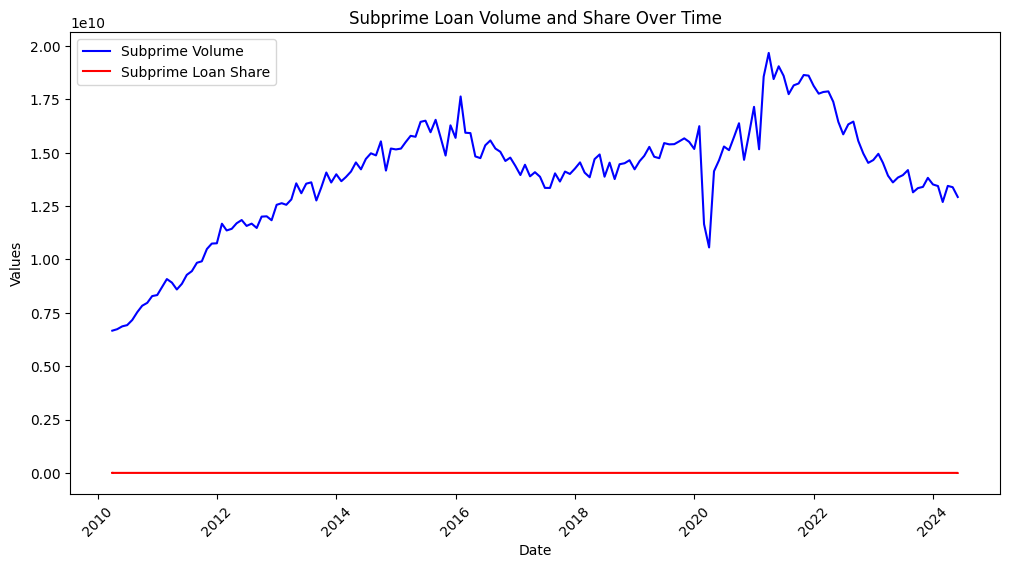

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['subprime_vol'], label='Subprime Volume', color='blue')
plt.plot(merged_data['date'], merged_data['subprime_loan_share'], label='Subprime Loan Share', color='red')
plt.legend()
plt.title('Subprime Loan Volume and Share Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


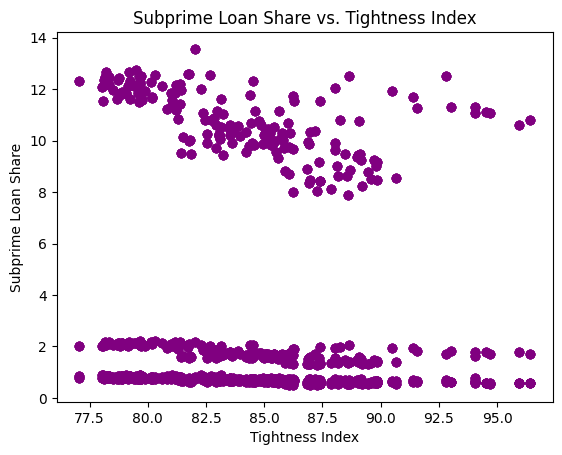

In [158]:
plt.scatter(merged_data['tightness_index'], merged_data['subprime_loan_share'], color='purple')
plt.title('Subprime Loan Share vs. Tightness Index')
plt.xlabel('Tightness Index')
plt.ylabel('Subprime Loan Share')
plt.show()


In [159]:
print(merged_data[['subprime_vol', 'subprime_loan_share']].describe())


       subprime_vol  subprime_loan_share
count  3.420000e+03          3420.000000
mean   1.394403e+10             3.469772
std    2.670691e+09             4.247329
min    6.662425e+09             0.505428
25%    1.310019e+10             0.712311
50%    1.438245e+10             1.085837
75%    1.548796e+10             3.641989
max    1.967365e+10            13.561327


In [160]:
# Perform correlation analysis between tightness_index, subprime_loan_share, and subprime_vol
correlation_analysis = merged_data[['tightness_index', 'subprime_loan_share', 'subprime_vol']].corr()

# Display the correlation matrix
correlation_analysis


,tightness_index,subprime_loan_share,subprime_vol
tightness_index,1.000000,-0.058718,-0.316238
subprime_loan_share,-0.058718,1.000000,-0.030986
subprime_vol,-0.316238,-0.030986,1.000000


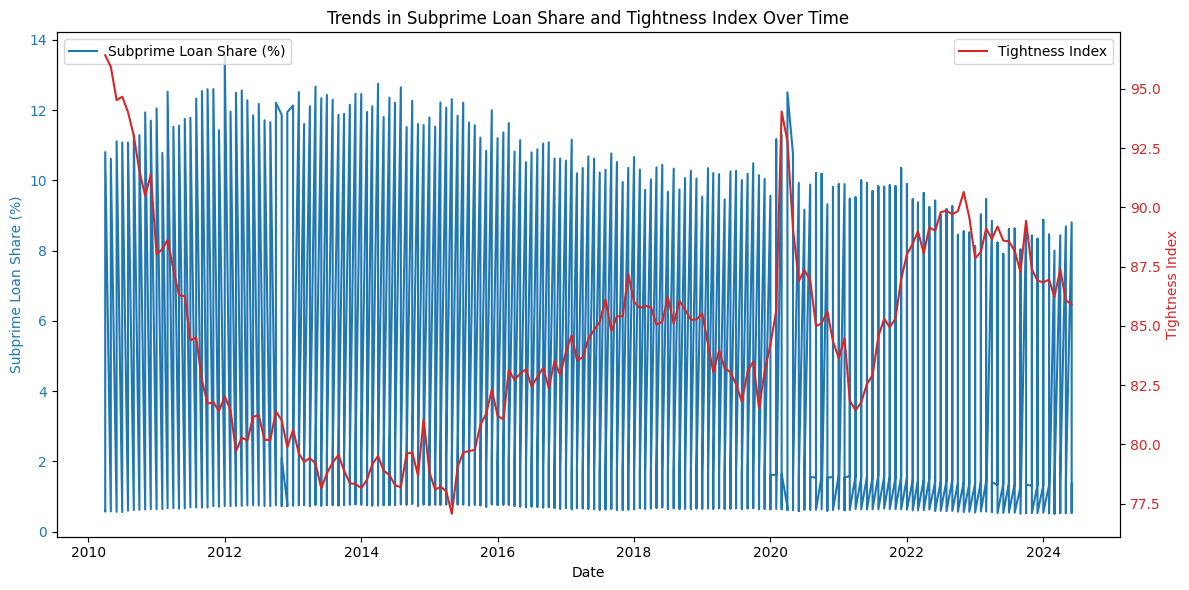

In [161]:
# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Subprime Loan Share and Volume on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Subprime Loan Share (%)', color=color)
ax1.plot(merged_data['date'], merged_data['subprime_loan_share'], color=color, label='Subprime Loan Share (%)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a secondary y-axis for Tightness Index
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Tightness Index', color=color)
ax2.plot(merged_data['date'], merged_data['tightness_index'], color=color, label='Tightness Index')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Trends in Subprime Loan Share and Tightness Index Over Time')

plt.tight_layout()
plt.show()

<ipython-input-162-4ec0a7c4d27d>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[x['credit_score_group'].isin(['Subprime', 'Deep subprime'])]['vol'].sum())


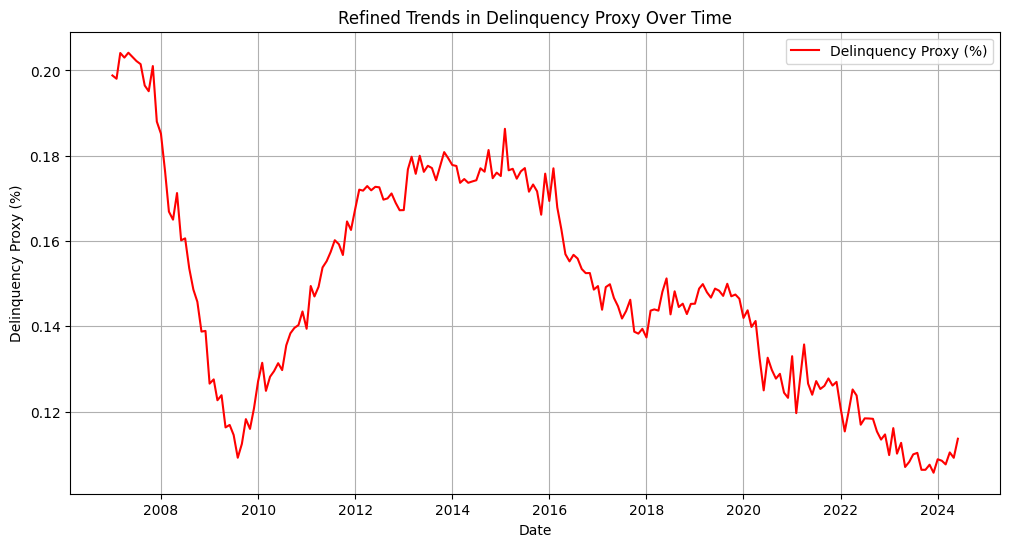

In [162]:
# Aggregate total volume and subprime volume
delinquency_data = (
    vol_score_data.groupby(['month', 'date'])
    .apply(lambda x: x[x['credit_score_group'].isin(['Subprime', 'Deep subprime'])]['vol'].sum())
    .reset_index(name='subprime_vol')
)

delinquency_data['total_vol'] = vol_score_data.groupby(['month', 'date'])['vol'].sum().values

# Calculate delinquency proxy
delinquency_data['delinquency_proxy'] = delinquency_data['subprime_vol'] / delinquency_data['total_vol']


# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(delinquency_data['date'], delinquency_data['delinquency_proxy'], color='red', label='Delinquency Proxy (%)')
plt.title('Refined Trends in Delinquency Proxy Over Time')
plt.xlabel('Date')
plt.ylabel('Delinquency Proxy (%)')
plt.legend()
plt.grid(True)
plt.show()


In [163]:
# Aggregate total volume and subprime volume without deprecated behavior
delinquency_data = (
    vol_score_data[vol_score_data['credit_score_group'].isin(['Subprime', 'Deep subprime'])]
    .groupby(['month', 'date'], as_index=False)['vol']
    .sum()
    .rename(columns={'vol': 'subprime_vol'})
)

# Add total volume for each month and date
total_vol_data = (
    vol_score_data.groupby(['month', 'date'], as_index=False)['vol']
    .sum()
    .rename(columns={'vol': 'total_vol'})
)

# Merge subprime volume and total volume
delinquency_data = delinquency_data.merge(total_vol_data, on=['month', 'date'])

# Calculate delinquency proxy
delinquency_data['delinquency_proxy'] = delinquency_data['subprime_vol'] / delinquency_data['total_vol']

# Display the resulting dataset
print(delinquency_data.head())  # Display first few rows for validation


   month       date  subprime_vol     total_vol  delinquency_proxy
0     84 2007-01-01  6.909519e+09  3.475235e+10           0.198822
1     85 2007-02-01  6.856284e+09  3.461842e+10           0.198053
2     86 2007-03-01  7.022819e+09  3.441068e+10           0.204088
3     87 2007-04-01  6.846067e+09  3.372292e+10           0.203009
4     88 2007-05-01  7.115976e+09  3.485599e+10           0.204154


In [164]:
print(delinquency_data.columns)

merged_data = delinquency_data.merge(crt_data, on='date', how='left')
print(merged_data.columns)


Index(['month', 'date', 'subprime_vol', 'total_vol', 'delinquency_proxy'], dtype='object')
Index(['month_x', 'date', 'subprime_vol', 'total_vol', 'delinquency_proxy',
       'month_y', 'tightness_index', 'unadjusted_credit_tightness_index'],
      dtype='object')


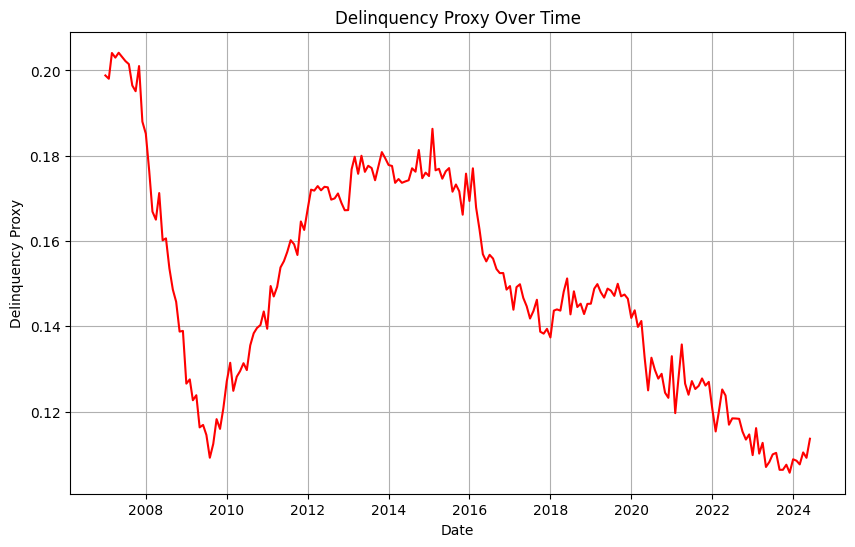

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(merged_data['date'], merged_data['delinquency_proxy'], color='red')
plt.title('Delinquency Proxy Over Time')
plt.xlabel('Date')
plt.ylabel('Delinquency Proxy')
plt.grid(True)
plt.show()


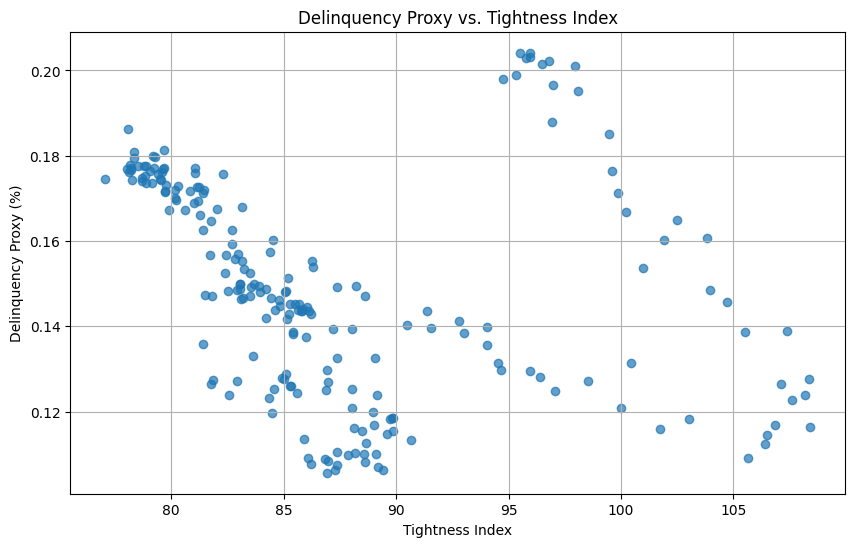

In [166]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['tightness_index'], merged_data['delinquency_proxy'], alpha=0.7)
plt.title('Delinquency Proxy vs. Tightness Index')
plt.xlabel('Tightness Index')
plt.ylabel('Delinquency Proxy (%)')
plt.grid(True)
plt.show()


In [167]:

# Start with the delinquency data as your primary DataFrame
merged_data = delinquency_data[['date', 'delinquency_proxy']].copy()

# 1. Merge Tightness Index
merged_data = merged_data.merge(
    crt_data[['date', 'tightness_index']],
    on='date',
    how='left'
)

# 2. Merge Inquiry Index
merged_data = merged_data.merge(
    inq_data[['date', 'inquiry_index']],
    on='date',
    how='left'
)

# 3. Merge Year-over-Year Data
merged_data = merged_data.merge(
    yoy_data[['date', 'yoy_num', 'yoy_vol']],
    on='date',
    how='left'
)

# Check the first few rows of the merged DataFrame
print(merged_data.head(10))
print(merged_data.columns)



        date  delinquency_proxy  tightness_index  inquiry_index   yoy_num  \
0 2007-01-01           0.198822         95.32425      149.79167  0.001449   
1 2007-02-01           0.198053         94.73592      148.69784  0.045930   
2 2007-03-01           0.204088         95.49024      151.26017  0.014119   
3 2007-04-01           0.203009         95.79047      146.36939  0.015635   
4 2007-05-01           0.204154         95.94953      147.46640  0.035221   
5 2007-06-01           0.203154         95.96096      144.28279 -0.018249   
6 2007-07-01           0.202197         96.79727      141.89043 -0.025515   
7 2007-08-01           0.201475         96.49167      142.91123 -0.019399   
8 2007-09-01           0.196468         96.96535      144.06807 -0.022226   
9 2007-10-01           0.195125         98.06971      147.78273  0.034441   

    yoy_vol  
0  0.013209  
1  0.088479  
2  0.040401  
3  0.029110  
4  0.048777  
5 -0.023743  
6 -0.042645  
7 -0.020025  
8 -0.013858  
9  0.055785 

In [168]:

# Calculate correlation
correlation_matrix = merged_data[['delinquency_proxy', 'tightness_index', 'inquiry_index', 'yoy_num', 'yoy_vol']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   delinquency_proxy  tightness_index  inquiry_index  \
delinquency_proxy           1.000000        -0.279896      -0.208325   
tightness_index            -0.279896         1.000000      -0.650985   
inquiry_index              -0.208325        -0.650985       1.000000   
yoy_num                     0.285551        -0.516914       0.088931   
yoy_vol                     0.210965        -0.560538       0.190043   

                    yoy_num   yoy_vol  
delinquency_proxy  0.285551  0.210965  
tightness_index   -0.516914 -0.560538  
inquiry_index      0.088931  0.190043  
yoy_num            1.000000  0.957392  
yoy_vol            0.957392  1.000000  


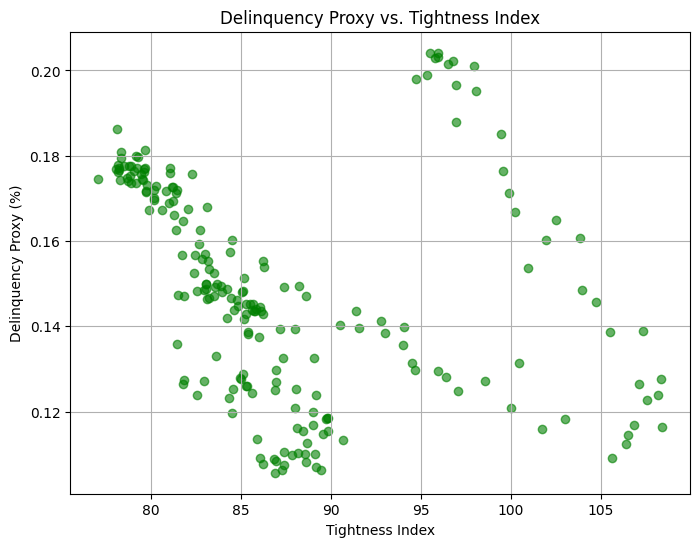

In [169]:

plt.figure(figsize=(8, 6))
plt.scatter(merged_data['tightness_index'], merged_data['delinquency_proxy'], alpha=0.6, color='green')
plt.title('Delinquency Proxy vs. Tightness Index')
plt.xlabel('Tightness Index')
plt.ylabel('Delinquency Proxy (%)')
plt.grid(True)
plt.show()


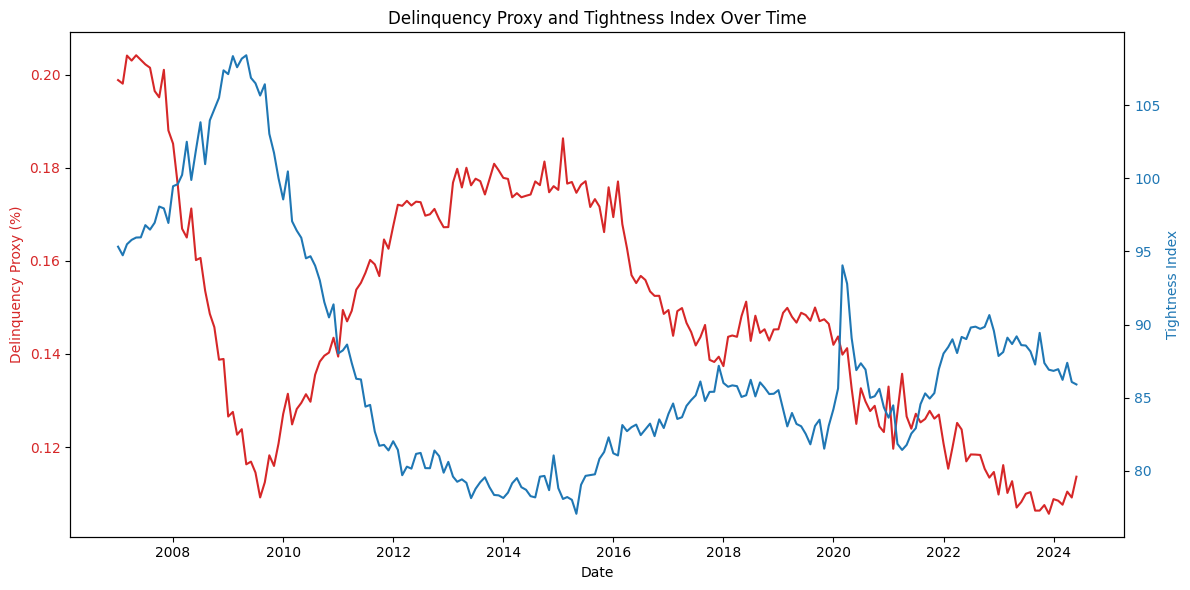

In [170]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot delinquency proxy
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Delinquency Proxy (%)', color=color)
ax1.plot(merged_data['date'], merged_data['delinquency_proxy'], color=color, label='Delinquency Proxy')
ax1.tick_params(axis='y', labelcolor=color)

# Plot tightness index on second y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Tightness Index', color=color)
ax2.plot(merged_data['date'], merged_data['tightness_index'], color=color, label='Tightness Index')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Delinquency Proxy and Tightness Index Over Time')
fig.tight_layout()
plt.show()


In [171]:
total_income_vol = (
    vol_income_data.groupby('date')['vol']
    .sum()
    .reset_index(name='total_income_vol')
)

merged_income = pd.merge(vol_income_data, total_income_vol, on='date', how='left')
merged_income['income_share'] = merged_income['vol'] / merged_income['total_income_vol']

print(merged_income.head())


   month       date           vol     vol_unadj income_level_group  \
0    123 2010-04-01  1.131306e+10  1.145620e+10               High   
1    123 2010-04-01  1.161548e+10  1.199791e+10             Middle   
2    123 2010-04-01  3.860946e+09  4.025362e+09           Moderate   
3    123 2010-04-01  6.167375e+08  6.523080e+08                Low   
4    124 2010-05-01  1.128695e+10  1.199027e+10               High   

   total_income_vol  income_share  
0      2.740622e+10      0.412792  
1      2.740622e+10      0.423826  
2      2.740622e+10      0.140878  
3      2.740622e+10      0.022504  
4      2.746965e+10      0.410888  


In [172]:
income_pivot = merged_income.pivot_table(
    index='date',
    columns='income_level_group',
    values='income_share',
    aggfunc='mean'
).reset_index().rename_axis(None, axis=1)

print(income_pivot.head())


        date      High       Low    Middle  Moderate
0 2010-04-01  0.412792  0.022504  0.423826  0.140878
1 2010-05-01  0.410888  0.023089  0.427424  0.138600
2 2010-06-01  0.413155  0.021738  0.428803  0.136304
3 2010-07-01  0.412322  0.021471  0.427048  0.139160
4 2010-08-01  0.410741  0.022814  0.424695  0.141750


In [173]:
# Suppose we have delinquency_data with 'delinquency_proxy'
enhanced_data = pd.merge(delinquency_data, income_pivot, on='date', how='left')

# Columns now include: date, delinquency_proxy, High, Middle, Moderate, Low, etc.
print(enhanced_data.columns)


Index(['month', 'date', 'subprime_vol', 'total_vol', 'delinquency_proxy',
       'High', 'Low', 'Middle', 'Moderate'],
      dtype='object')


In [174]:
corr_cols = ['delinquency_proxy', 'High', 'Middle', 'Moderate', 'Low']
correlation_matrix = enhanced_data[corr_cols].corr()
print(correlation_matrix)


                   delinquency_proxy      High    Middle  Moderate       Low
delinquency_proxy           1.000000  0.356925  0.328870 -0.526476  0.070580
High                        0.356925  1.000000 -0.101597 -0.925976 -0.693135
Middle                      0.328870 -0.101597  1.000000 -0.264968 -0.137760
Moderate                   -0.526476 -0.925976 -0.264968  1.000000  0.640817
Low                         0.070580 -0.693135 -0.137760  0.640817  1.000000


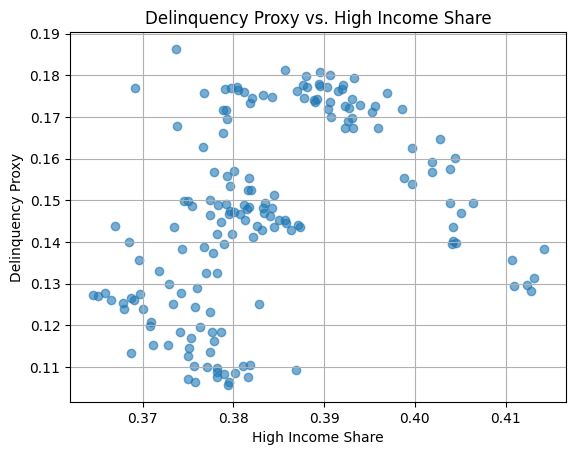

In [175]:
# Delinquency vs. High income share

plt.scatter(enhanced_data['High'], enhanced_data['delinquency_proxy'], alpha=0.6)
plt.xlabel('High Income Share')
plt.ylabel('Delinquency Proxy')
plt.title('Delinquency Proxy vs. High Income Share')
plt.grid(True)
plt.show()



In [176]:
def calculate_credit_score(row):
    # Factor-to-score maps
    credit_score_map = {
        'Super-prime': 90,
        'Prime': 70,
        'Near-prime': 50,
        'Subprime': 30,
        'Deep subprime': 10
    }

    income_map = {
        'High': 90,
        'Middle': 70,
        'Moderate': 50,
        'Low': 30
    }

    def inquiry_index_score(val):
        if val < 100: return 80
        elif val < 150: return 50
        else: return 20

    def dti_score(val):
        if val < 0.30: return 80
        elif val < 0.40: return 60
        else: return 30

    # Weights
    w_credit_score = 0.40
    w_income = 0.30
    w_inquiry = 0.10
    w_dti = 0.20

    # Base scores
    cs_base = credit_score_map.get(row['credit_score_group'], 0)
    income_base = income_map.get(row['income_level_group'], 0)
    inquiry_base = inquiry_index_score(row['inquiry_index'])
    dti_base = dti_score(row['dti'])

    # Calculate weighted sum
    final_score = (
        cs_base * w_credit_score +
        income_base * w_income +
        inquiry_base * w_inquiry +
        dti_base * w_dti
    ) / 100.0  # Normalizing to keep the final score in a convenient range

    return final_score


# check with Sample data
data = {
    'credit_score_group': ['Super-prime', 'Prime', 'Subprime', 'Near-prime'],
    'income_level_group': ['High', 'Middle', 'Low', 'Moderate'],
    'inquiry_index': [80, 120, 180, 90],
    'dti': [0.25, 0.38, 0.45, 0.32]
}

df = pd.DataFrame(data)
df['CreditScore'] = df.apply(calculate_credit_score, axis=1)
print(df)


  credit_score_group income_level_group  inquiry_index   dti  CreditScore
0        Super-prime               High             80  0.25         0.87
1              Prime             Middle            120  0.38         0.66
2           Subprime                Low            180  0.45         0.29
3         Near-prime           Moderate             90  0.32         0.55
